In [3]:
import sys
sys.path.append('../')

from src import *

# Iris Analysis

In [4]:
df = load_data('../data/processed/processed_iris.csv')

Data loaded successfully.


In [5]:
X = df.drop(columns=['Id', 'Species'], axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = split_data(X, y)

Data split successfully.


In [6]:
X_train = data_normalize(X_train, method='minmax')

Data normalized successfully.


In [7]:
X_test = data_normalize(X_test, method='minmax')

Data normalized successfully.


In [8]:
input_shape = X_train.shape[1]
latent_dim = 2
topology = [16, 8, 4]

In [9]:
encoder = build_encoder(latent_dim, input_shape, topology)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input_layer │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 16)        │         80 │ encoder_input_la… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 8)         │        136 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 4)         │         36 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean_layer        │ (None, 2)         │         10 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var_layer     │ (None, 2)         │         10 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 2)         │          0 │ z_mean_layer[0][… │
│                     │                   │            │ z_log_var_layer[… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 272 (1.06 KB)

 Trainable params: 272 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
decoder = build_decoder(latent_dim, input_shape, topology)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input_layer             │ (None, 2)              │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_outputs (Dense)         │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264 (1.03 KB)

 Trainable params: 264 (1.03 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
vae = VAE(encoder, decoder, beta=0.1)

In [12]:
optimizer = optimizer_adam(lr=0.0005)
vae.compile(optimizer=optimizer)

Successfuly created optimizer: Adam with learning rate 0.0005


In [15]:
model_checkpoint = model_checkpoint_callback("./checkpoint.keras")

Model checkpoint callback created.


In [13]:
loss_tracker = LossTracker()

In [ ]:
vae.fit(
    X_train, 
    epochs=100, 
    batch_size=8, 
    validation_data=(X_test, None), 
    callbacks=[model_checkpoint, loss_tracker]
)

Epoch 1/500
 1/15 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - kl_loss: 0.0405 - reconstruction_loss: 6.7095 - total_loss: 6.7135Epoch 1, Loss: 5.5991
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - kl_loss: 0.0426 - reconstruction_loss: 6.0800 - total_loss: 6.0842 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 2/500
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - kl_loss: 0.0479 - reconstruction_loss: 4.8312 - total_loss: 4.8359Epoch 2, Loss: 5.0368
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - kl_loss: 0.0453 - reconstruction_loss: 5.1503 - total_loss: 5.1548 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 3/500
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - kl_loss: 0.0382 - reconstruction_loss: 4.9627 - total_loss: 4.9665Epoch 3, Loss: 4.8812
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - kl_loss: 0.0354 - reconstruction_loss: 4.8103 - total_loss: 4.8138 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+0

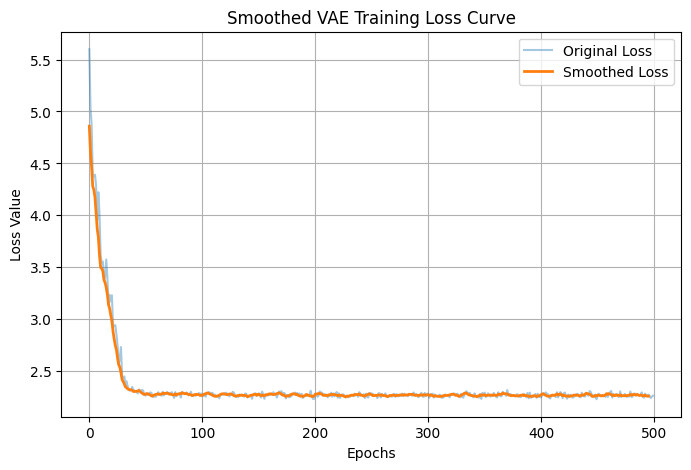

In [ ]:
plot_loss(loss_tracker)

In [ ]:
print(f"Min value of data: {X_train.min()}")
print(f"Max value of data: {X_train.max()}")


Min value of data: -2.0710167384048943
Max value of data: 2.4382096121010415
